In [1]:
%load_ext autoreload
%autoreload 2

import torch
from resnet_module import ResNetModel

from resnet_training import get_predictions, plot_confusion_matrix, calculate_gender_bias, calculate_age_bias

wandb: Currently logged in as: jacob314. Use `wandb login --relogin` to force relogin


In [2]:
# Evaluate overall accuracy
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")


model = ResNetModel.load_from_checkpoint('./bias-skin-lesion-detection/gv546zt3/checkpoints/resnet18.cpkt', map_location=device)

predictions, all_labels = get_predictions(model)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-PCIE-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 64 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  ra

Predicting: 0it [00:00, ?it/s]

/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/pytorch_lightning/loggers/wandb.py:395: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  rank_zero_warn(


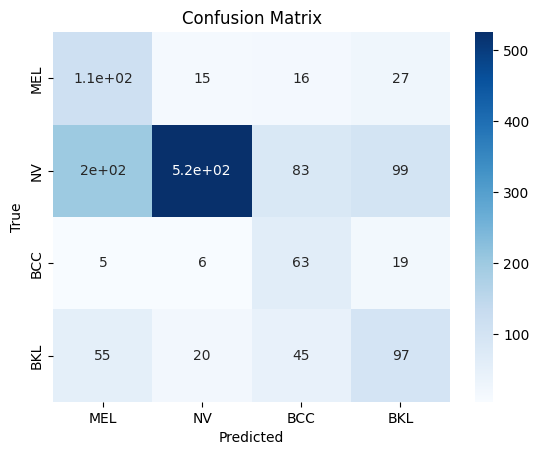

In [6]:
# Plot confusion matrix

plot_confusion_matrix(predictions, all_labels)

In [7]:
# Evaluate bias based on sex
calculate_gender_bias(predictions, all_labels)

Observed 248 labels out of 1390 to be unknown
male_acc: 0.6235679388046265
female_acc: 0.6478342413902283
bias: 0.00029442672058799246


{'male_acc': 0.6235679388046265,
 'female_acc': 0.6478342413902283,
 'bias': 0.00029442672058799246}

In [8]:
# Evaluate bias based on age groups

calculate_age_bias(predictions, all_labels)

Observed 0 ages out of 1390 to be unknown
upto30 has 153 samples
35to55 has 606 samples
60up has 631 samples
unknown has 0 samples
accuracies: {'upto30': 0.3202614486217499, '35to55': 0.7260726094245911, '60up': 0.48969894647598267}
bias: 0.041544045407832485


{'accuracies': {'upto30': 0.3202614486217499,
  '35to55': 0.7260726094245911,
  '60up': 0.48969894647598267},
 'bias': 0.041544045407832485}


## Resnet without new sample probs

upto30 has 153 samples
35to55 has 606 samples
60up has 631 samples
-10.0 has 0 samples
{'upto30': 0.24836601316928864, '35to55': 0.6716171503067017, '60up': 0.48335975408554077}
overall_accuracy: 0.539568305015564
bias: 0.0449674050983165

## Resnet with new sample probs

upto30 has 153 samples
35to55 has 606 samples
60up has 631 samples
-10.0 has 0 samples
{'upto30': 0.32679739594459534, '35to55': 0.6881188154220581, '60up': 0.4358161687850952}
overall_accuracy: 0.533812940120697
bias: 0.034349147750812214
